In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
from signalUtils import addAwgn

%matplotlib inline


Text(0.5, 1.0, 'Sin')

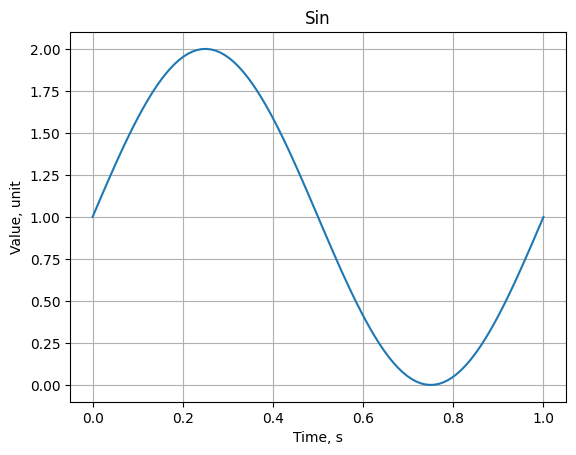

In [7]:
samplingFrequency = 100
startTime = 0
stopTime = 1

SnrValue = 30

sinFrequency = 1
sinPhase = math.radians(0)
sinAmplitude = 1
sinBias = 1

time = np.linspace(startTime, stopTime, (stopTime - startTime) * samplingFrequency)

sinArg = 2 * np.pi * sinFrequency * time + sinPhase

sinSignal = sinAmplitude * np.sin(sinArg) + sinBias

plt.plot(time, sinSignal)
plt.ylabel("Value, unit")
plt.xlabel("Time, s")
plt.grid(True)
plt.title("Sin")     

Text(0.5, 1.0, 'Sin with Noise')

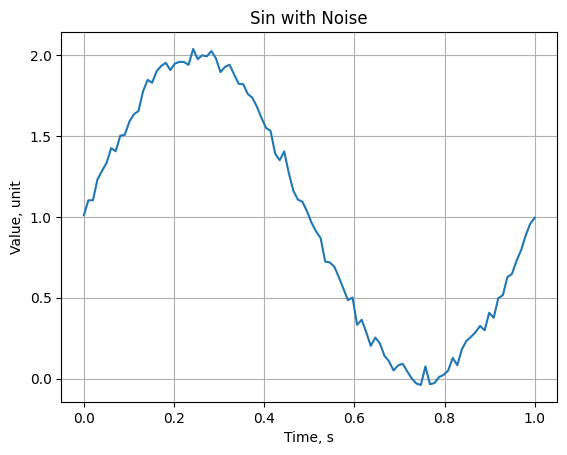

In [8]:
sinWithNoise = addAwgn(sinSignal, SnrValue)

plt.plot(time, sinWithNoise)
plt.ylabel("Value, unit")
plt.xlabel("Time, s")
plt.grid(True)
plt.title("Sin with Noise")

In [ ]:
# B = [0.4, 1, 0.4, 0.5]

# rows = len(sinWithNoise);

# for interation = 1:100000

#     %build J and r
#     for row = 1:rows
#          xk = x(row);

#         J(row,1) = sin(B(2) * xk + B(3));

#         J(row,2) = B(1) * xk * cos(B(2) * xk + B(3)); 

#         J(row,3) = B(1) * cos(B(2) * xk + B(3)); 

#         J(row,4) = 1.0;  

#         r(row) =  -yn(row) +  B(1) * sin(B(2) * xk + B(3)) + B(4);


#     Jt = transpose(J);    
#     delta = (inv(Jt*J))*Jt*r';   
#     B = B - damp*delta;
